In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.io import loadmat

2. Load Data

In [2]:
data = loadmat('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\7- ex7data2.mat')
print('The Shape Of Data Is ==> ',data['X'].shape)

The Shape Of Data Is ==>  (300, 2)


In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

# Create Functions 
1. Create Function To Select An Intial_Centroids Random From Data 
2. Create Function To Detect And Choose Points Closet Hers

In [4]:
def intial_Cen(x,k_num):
    m,n = x.shape # Take The Same Shape From Original Data (M ==> 300 Rows , N ==> 2 Columns)
    centroids = np.zeros((k_num,n)) # I Need Output (K_Num * 2 Columns) ==> Output Number Of Rows depend on number of k 
    points = np.random.randint(0,m,k_num) # Choose Number Of Points Random From 0 To 300 , Depend on Number Of K Numbers 
    for i in range (k_num): # Detect Number Of Clusters Randomly
        centroids[i,:] = x[points[i],:]
    return centroids
#====================================================================================================================================
def find_closeset_centroids(x,cen): # Took X(Data) & Intial Centroids That Come From Intial_Cen Function 
    m = x.shape[0]#M ==> Number Of Rows In Data X That Equal 300
    k =cen.shape[0] #K Is == 3
    idx = np.zeros(m)#Idx Is About List Contains 300 Zeros [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ......] , That Same Dim Of M 
    for i in range (m):#I Is About 300 Numbers 
        minimum_distance = 1000000
        for j in range(k): # J is about ==> 0 , 1 , 2
            real_distance =np.sum((x[i,:] - cen[j , : ] ) ** 2 )
            if real_distance < minimum_distance:
                minimum_distance =real_distance
                idx[i]= j
    return idx 

1. First Step Make Classfying For Data 
2. Show The Intial Centroids 

In [7]:
x_data =data['X']
#init_centroids =np.array([[8,0],[8,6],[0,3]])
init_centroids =intial_Cen(x_data,3)
print(init_centroids)
print('**'*30)
points =find_closeset_centroids(x_data,init_centroids) # Send X Data , Intial_Centroids That == 3 
print(points)

[[5.97510328 3.0259191 ]
 [4.95679428 2.89776297]
 [0.96791348 1.16166819]]
************************************************************
[1. 0. 0. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2.
 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2.
 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1.
 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2.
 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2.
 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2.
 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2.
 2. 1. 2. 2. 1. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.

# Create Functions 
1. Compute Displacement For New Centroids 
2. Apply K-Means 

In [8]:
#Make Function Calculate The Displacement For New Centroids 
def compute_centroids(x,idx,k):
    m,n =x.shape #M The Number Of Rows That == 300 && N is The Number Of Column That == 2
    new_centroids = np.zeros((k,n))
    for i in range (k):
        indices = np.where(idx == i)#Meaning Take The Value For Idx When IDX==I(0,1,2)
        new_centroids[i,:]=(np.sum(x[indices,:] ,axis=1) / len(indices[0])).ravel()
    return new_centroids
#====================================================================================
#Make Function To Apply K-Means Algorithm
def run_k_means(x,int_cen,max_iter):
    m,n = x.shape
    k = int_cen.shape[0]
    idx = np.zeros(m)
    centroids = int_cen
    for i in range(max_iter):
        idx = find_closeset_centroids(x,centroids) #Make Selection For Points
        centroids =compute_centroids(x,idx,k)
    return idx ,centroids

1. Clacultae The New Centroids 
2. Take All Points In The Same Cluster And Find Mean 
3. Make Displacement

In [9]:
c = compute_centroids(x_data,points ,3 )
print(c)

[[6.35619798 2.99646109]
 [3.43241545 3.43656541]
 [1.9807379  2.43268961]]


# Draw The Clusters And Repeat The Step Selection & Displacement (n) Times 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[5.97510328 3.0259191 ]
 [4.95679428 2.89776297]
 [0.96791348 1.16166819]]
[1. 0. 0.

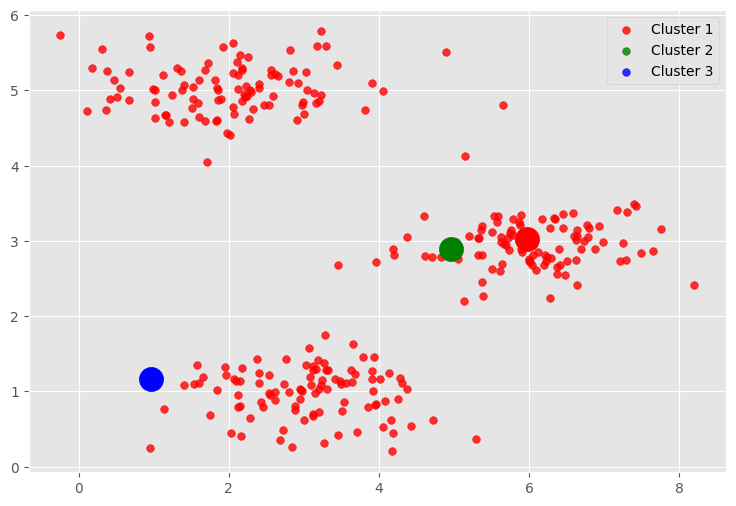

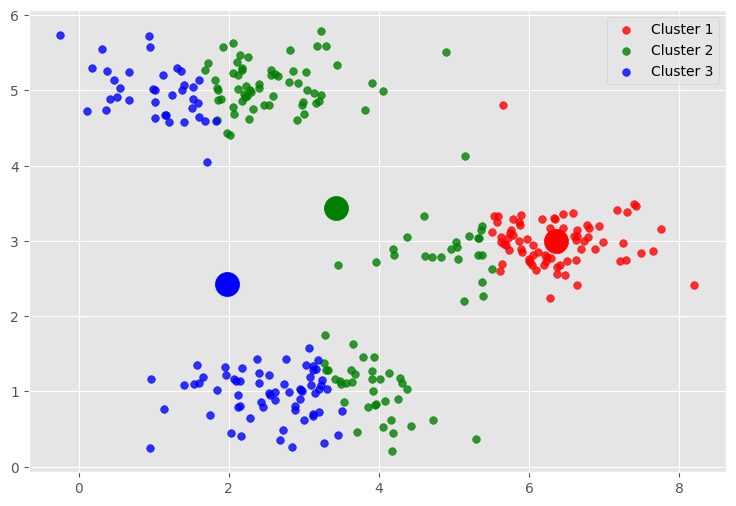

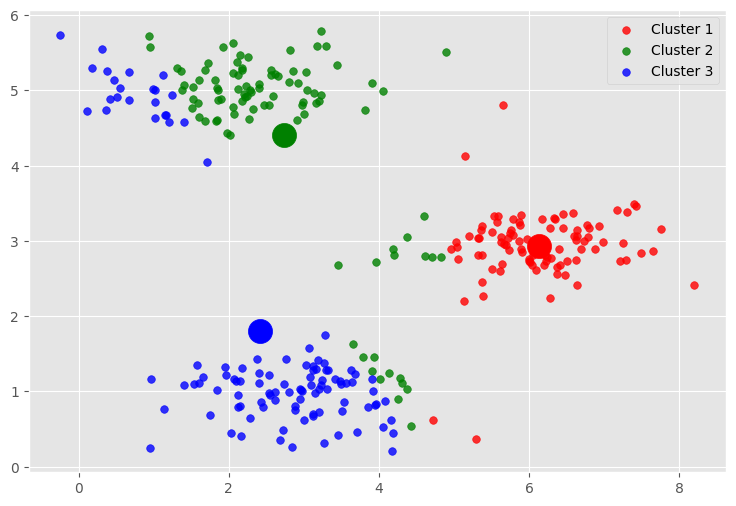

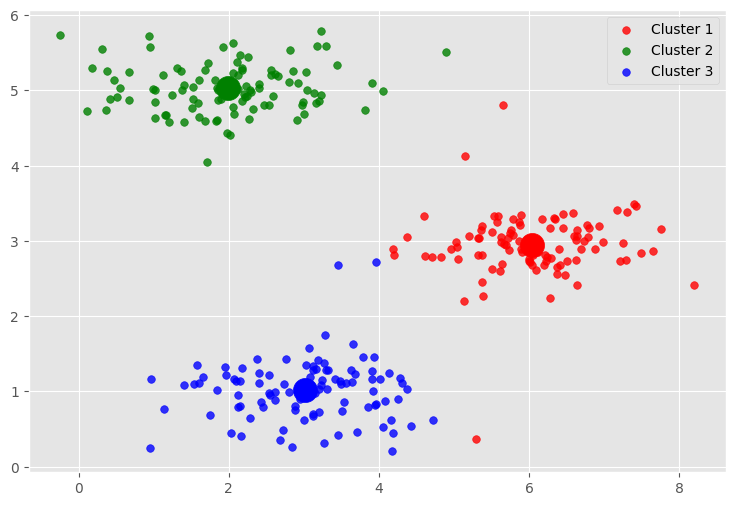

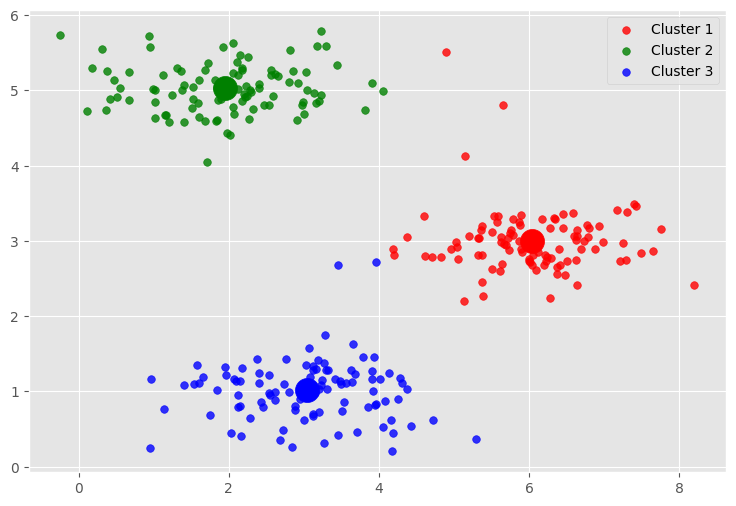

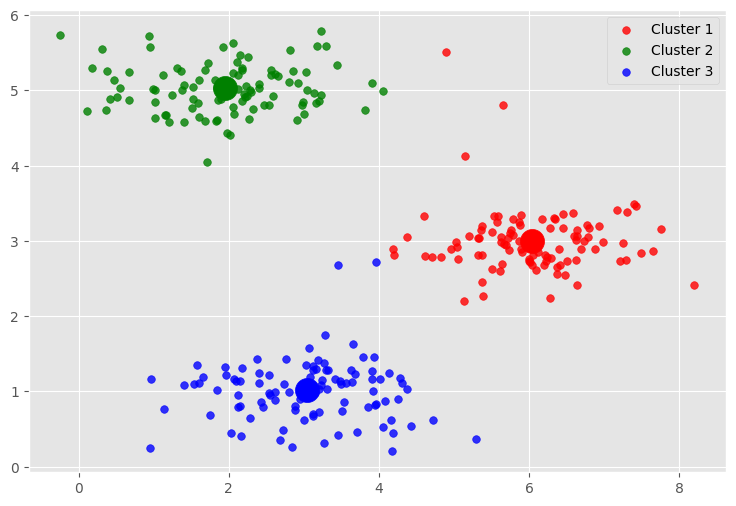

In [10]:
for r in range(6):
    #Fisrt Step Make And Apply K-Means
    points,centroids=run_k_means(x_data,init_centroids,r)
    print(points)
    print()
    print(centroids)
    #Draw And Make Clusters
    cluster1 = x_data[np.where(points == 0)[0],:]
    cluster2 = x_data[np.where(points == 1)[0],:]
    cluster3 = x_data[np.where(points == 2)[0],:]
    plt.style.use('ggplot')
    fig,ax =plt.subplots(figsize =(9,6))
    ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r',alpha = 0.8,label = 'Cluster 1')
    ax.scatter(centroids[0,0],centroids[0,1],s=300,color ='r')
    
    ax.scatter(cluster2[:,0],cluster2[:,1],s= 30 ,color ='g',alpha = 0.8,label ='Cluster 2')
    ax.scatter(centroids[1,0],centroids[1,1],s=300,color='g')
    
    ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b',alpha = 0.8,label ='Cluster 3')
    ax.scatter(centroids[2,0],centroids[2,1],s = 300 ,color ='b')
    ax.legend()